**Jaylyn Morris Individual Project**

# **1. Data Description**
 
### **players.csv:**

196 total observations 

Variables:
* experince:level of player (beginner, amature, regular, pro, veteran)(categorical).
* Age: age of the player (years) (numerical)
* gender: gender identity of the player (categorical)
* hashedEmail: hidden email of the player (categorical)
* subscribe: is/not subscribed to the newsletter (categorical)
* played_hours: time played the game (hours) (numerical)
* name: name of player (categorical)

Potential issues:
* extreme outliers
* hours_played has either large or small values
* gender column is unbalanced  

                                    Summary Statistics players.csv

| summary stats | age (years)| hours played | 
| -------------|-------------|--------------|   
|min           | 8           |0             |   
|max           | 50          | 223.1        |   
|mean          | 20.5        | 5.9          |   
|median        | 19          | 0.1          | 
|stand. dev.   | 6.2         | 28.3         |

                                              Gender values:

|Gender      | count |
|------------|-------|
|male        | 124   |
|female      | 37    |
|non-binary  | 15    |
|two-spirit  | 6     |
|other       | 1     |
|agender     | 2     |
|prefer      | 11    |
|not to say  |       |

                                          Experience level values:

|Experience | count |
|-----------|-------|
|Beginner   | 35    |
|amateur    | 63    |
|regular    | 36    |
|pro        | 14    | 
|veteran    | 48    |

                                        subsciber to newsletter value:

|Subscribed | count |
|-----------|-------|
| yes       | 144   |
| no        | 52    | 

### **sessions.csv:**

observations: 1535

Variables:
* hashedEmail: hidden email address of participant (categorical)
* start_time: date/time beginning of session (categorical)
* end_time: date/time end of session (categorical)
* original_Start_time: UNIX time beinning of session (numerical)
* original_end_time: UNIX time end of session (numerical)

Potential issues with dataset:
* untidy format

                                Sessions.csv Summary Statistics Table: 

|summary stats | Start of session (UNIX time) | end of session (UNIX time) |
|--------------|------------------------------|----------------------------|
|min           | 1.7124e+12                   | 1.7124e+12                 |
|max           | 1.72733e+12                  | 1.72734e+12                |
|mean          | 1.719201e+12                 | 1.719196e+12               |
|median        | 1.7192e+12                   | 1.71918e+12                |
|stand. dev.   | 3557491589                   | 3552813134                 |



# **2. Questions**

Broad question #2 We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.
 
Specific question: Can age predict the amount of hours played by participants in the players.csv dataset?
 
The classifier will make predictions on the hours played based on players' age to determine the best age range of players to recuit.

### **Loading Data into R and tidy**

In [12]:
#nessesary packages 
library(tidyverse)
library(repr)
library(tidymodels)
library(ggplot2)
options(repr.matrix.max.rows = 6)
set.seed(999)

In [13]:
# loading data tables into the notebook
set.seed(999)
url_players_data<-"https://raw.githubusercontent.com/jay-morris/Individual_Project/refs/heads/main/players.csv"

url_sessions_data<-"https://raw.githubusercontent.com/jay-morris/Individual_Project/refs/heads/main/sessions.csv"

players_data<-read_csv(url_players_data)

sessions_data<-read_csv(url_sessions_data)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [14]:
# untidy 
set.seed(999)
players_data 

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


In [15]:
# tidy the data to be human readable 
set.seed(999)
players_tidy<-players_data|>
rename(hashed_email=hashedEmail)
players_tidy

experience,subscribe,hashed_email,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,17
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


In [16]:
#untidy
set.seed(999)
sessions_data

hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28/07/2024 15:36,28/07/2024 15:57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024 06:15,25/07/2024 06:22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024 02:26,20/05/2024 02:45,1.71617e+12,1.71617e+12


In [17]:
# tidy data of sessions.csv
set.seed(999)
sessions_tidy<- sessions_data|>
separate(col=start_time, into=c("start_date", "start_time"), sep="\ ")|>
separate(col=end_time, into=c("end_date", "end_time"), sep="\ ")|>
separate(col=start_date, into=c("start_day", "start_month", "start_year"))|>
separate(col=start_time, into=c("start_hour", "start_minutes"), sep=":")|>
separate(col=end_date, into=c("end_day", "end_month", "end_year"))|>
separate(col=end_time, into=c("end_hour", "end_minutes"), sep=":") |>
select(-original_start_time, -original_end_time)|> 
rename(hashed_email=hashedEmail)
sessions_tidy

hashed_email,start_day,start_month,start_year,start_hour,start_minutes,end_day,end_month,end_year,end_hour,end_minutes
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30,06,2024,18,12,30,06,2024,18,24
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17,06,2024,23,33,17,06,2024,23,46
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25,07,2024,17,34,25,07,2024,17,57
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28,07,2024,15,36,28,07,2024,15,57
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25,07,2024,06,15,25,07,2024,06,22
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20,05,2024,02,26,20,05,2024,02,45


# **3. Exploratory Data Analysis and Visualization**

Warning message:
“Removed 6 rows containing missing values or values outside the scale range
(`geom_point()`).”


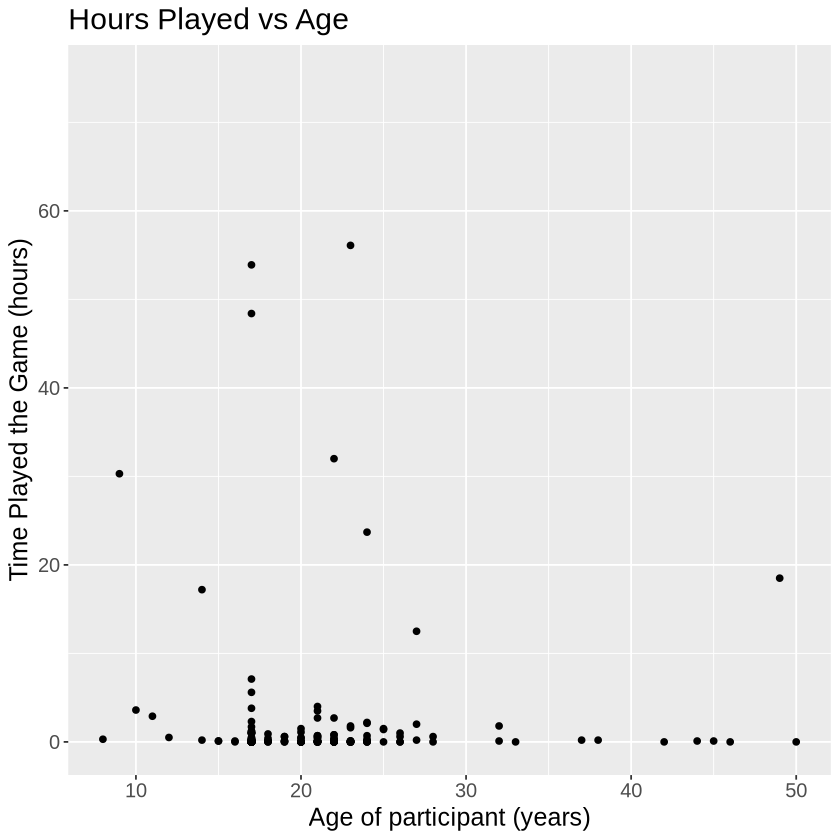

In [18]:
# Visulisations to see relationships between predictive and response variables
# Scatter plot 1: hours played vs Age
set.seed(999)
hours_vs_Age_plot<- ggplot(players_data, aes(x=Age, y=played_hours)) + geom_point()+
labs(x="Age of participant (years)", y="Time Played the Game (hours)") + 
ggtitle("Hours Played vs Age") + ylim(c=0,75) + theme(text = element_text(size = 15))#set range from 0-75 to exclude extreme outliers
hours_vs_Age_plot

**The age range ~15-28 to have the highest value of hours played. These players appear be the best recruits for this study. Lots of overlapping data points. Relationship is not linear.**

Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_bin()`).”


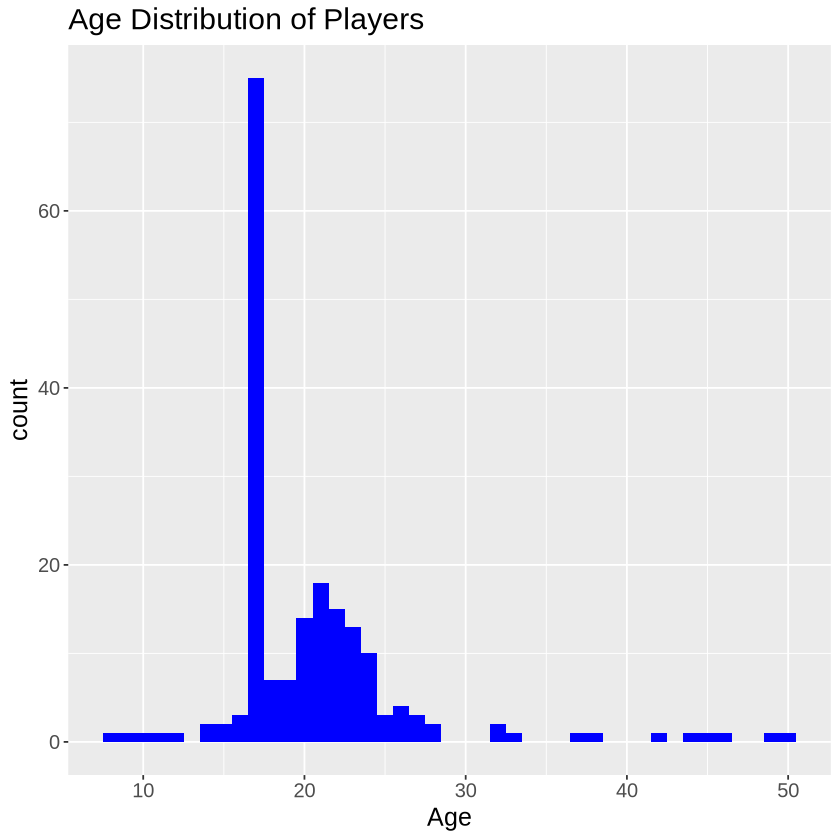

In [19]:
# histagram of age distibution of players_data
set.seed(999)
histogram_age<-ggplot(players_data, aes(x=Age)) + geom_histogram(fill='blue', binwidth=1) + ggtitle("Age Distribution of Players")+ 
theme(text = element_text(size = 15)) 
histogram_age


**Majority of the participants are age range ~12-24. The data is unbalanced for the age variable and some ages have no particpants (gaps).**

# **4. Methods**

I will use the KNN regression approach to predict the response variable, played_hours, from the predicting variable, age. This method is appropriate because the value we are trying to predict is numerical, hence we are using regression rather than classification. Additionally, KNN regression is better for predicting data in datasets that have non-linear relationships, compared to the alternative, linear regression. No specific assumptions are made to KNN regression models. Limitations of using KNN regression are its slow speed and the accuracy of predictions beyond the training set.
* Mutate the categorical variables into factor variables by using the as_factor function. 
* Split the data into training and a testing set. Data will be split 75% into the training set and 25% into the testing set.
* Create a regression model by creating a recipe, model specification, and workflow. Set the neighbors = tune() as K needs to be chosen based on the cross-validation results. 
* Conduct 5-fold cross validation on the training set and run on a grid where K=1-10. These K values will ensure our model does not get too slow. Filter for the K value with the smallest RMSPE value and use a visual plot.   
* Retrain the KNN model with the determined K value. Create a new workflow and fit the testing data. 
* Use the predict function on the test data to determine the RMPSE of the regression model. 
* Make a plot of the predictions of the testing data. 
* If generalized well to the test data, then this regression model can be used to make predictions on unseen data to profile the best recruits for this study based upon age.
  


 **Calculating Summary Statistics for Question 1**

In [20]:
# Calculating numerical summary statistics of players.csv
set.seed(999)
summarize(players_data,
    min_age = min(Age, na.rm=TRUE),
    max_age = max(Age, na.rm=TRUE),
    mean_age= mean(Age, na.rm=TRUE),
    sd_age = sd(Age, na.rm=TRUE), 
    median_age=median(Age, na.rm=TRUE),
    min_hours = min(played_hours, na.rm=TRUE), 
    max_hours = max(played_hours, na.rm=TRUE), 
    mean_hours= mean(played_hours, na.rm=TRUE),
    sd_hours=sd(played_hours, na.rm=TRUE), 
    median_hours=median(played_hours, na.rm=TRUE))

min_age,max_age,mean_age,sd_age,median_age,min_hours,max_hours,mean_hours,sd_hours,median_hours
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8,50,20.52062,6.174667,19,0,223.1,5.845918,28.35734,0.1


In [21]:
# Calculating categorical summary statistics of players.csv
set.seed(999)
gender_count<- players_data|>
    count(gender, sort=TRUE)
experience_count<-players_data|>
    count(experience, sort=TRUE)
subscriber_count<- players_data|>
    count(subscribe, sort=TRUE)

In [22]:
# summary statistics of sessions.csv dataset 
set.seed(999)
summarize(sessions_data,
    min_start = min(original_start_time, na.rm=TRUE),
    max_start = max(original_start_time, na.rm=TRUE),
    mean_start= mean(original_start_time, na.rm=TRUE),
    sd_start = sd(original_start_time, na.rm=TRUE), 
    median_start=median(original_start_time, na.rm=TRUE),
    min_end = min(original_end_time, na.rm=TRUE), 
    max_end = max(original_end_time, na.rm=TRUE), 
    mean_end= mean(original_end_time, na.rm=TRUE),
    sd_end=sd(original_end_time, na.rm=TRUE), 
    median_end=median(original_end_time, na.rm=TRUE))

min_start,max_start,mean_start,sd_start,median_start,min_end,max_end,mean_end,sd_end,median_end
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.7124e+12,1.72733e+12,1.719201e+12,3557491589,1.7192e+12,1.7124e+12,1.72734e+12,1.719196e+12,3552813134,1.71918e+12
